In [1]:
RESULTS_CSV = "/home/admin/FEUP-Synthesizing-Audio-from-Textual-Input/data/working/stats/training_stats_1691406340.529213.csv"

In [2]:
# load csv into pandas dataframe
import pandas as pd

In [3]:
df = pd.read_csv(RESULTS_CSV)
df = df.set_index('Iteration')
df

,Epoch,Loss_D,Loss_G,D(x),D(G(z1)),D(G(z2)),Elapsed Time,Time Left (Epoch),Time Left (Total)
Iteration,,,,,,,,,
1,1,1.464086890220642,0.4556165635585785,0.541015625,0.5498046875,0.5498046875,00:00:03,00:10:52,09:06:42
2,1,1.4609177112579346,0.45705026388168335,0.54296875,0.5458984375,0.5458984375,00:00:04,00:06:48,05:44:27
3,1,1.4541044235229492,0.4614081084728241,0.54150390625,0.5341796875,0.5341796875,00:00:05,00:05:26,04:36:56
4,1,1.456394910812378,0.4601224660873413,0.541015625,0.53759765625,0.53759765625,00:00:06,00:04:45,04:03:17
5,1,1.4594006538391113,0.45782285928726196,0.54345703125,0.5439453125,0.5439453125,00:00:07,00:04:20,03:43:05
...,...,...,...,...,...,...,...,...,...
9045,50,1.6613636016845703,0.3574479818344116,0.5400390625,0.8447265625,0.8447265625,02:54:09,00:00:05,00:00:05
9046,50,1.6633405685424805,0.3562142550945282,0.54248046875,0.8486328125,0.8486328125,02:54:11,00:00:04,00:00:04
9047,50,1.6584436893463135,0.35863223671913147,0.54052734375,0.8408203125,0.8408203125,02:54:13,00:00:03,00:00:03


In [19]:
# remove all the lines where index = 'Iteration'
df = df[df.index != 'Iteration']

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Create new column which is iteration / 724
# iteration is the index
df['Dec_Epoch'] = df.index / 724
df

/tmp/ipykernel_1060052/2926059144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dec_Epoch'] = df.index / 724


,Epoch,Loss_D,Loss_G,D(x),D(G(z1)),D(G(z2)),Elapsed Time,Time Left (Epoch),Time Left (Total),Dec_Epoch
1,1,1.464086890220642,0.4556165635585785,0.541015625,0.5498046875,0.5498046875,00:00:03,00:10:52,09:06:42,0.001381
2,1,1.4609177112579346,0.45705026388168335,0.54296875,0.5458984375,0.5458984375,00:00:04,00:06:48,05:44:27,0.002762
3,1,1.4541044235229492,0.4614081084728241,0.54150390625,0.5341796875,0.5341796875,00:00:05,00:05:26,04:36:56,0.004144
4,1,1.456394910812378,0.4601224660873413,0.541015625,0.53759765625,0.53759765625,00:00:06,00:04:45,04:03:17,0.005525
5,1,1.4594006538391113,0.45782285928726196,0.54345703125,0.5439453125,0.5439453125,00:00:07,00:04:20,03:43:05,0.006906
...,...,...,...,...,...,...,...,...,...,...
9045,50,1.6613636016845703,0.3574479818344116,0.5400390625,0.8447265625,0.8447265625,02:54:09,00:00:05,00:00:05,12.493094
9046,50,1.6633405685424805,0.3562142550945282,0.54248046875,0.8486328125,0.8486328125,02:54:11,00:00:04,00:00:04,12.494475
9047,50,1.6584436893463135,0.35863223671913147,0.54052734375,0.8408203125,0.8408203125,02:54:13,00:00:03,00:00:03,12.495856
9048,50,1.659705400466919,0.35789868235588074,0.5419921875,0.84326171875,0.84326171875,02:54:15,00:00:02,00:00:02,12.497238


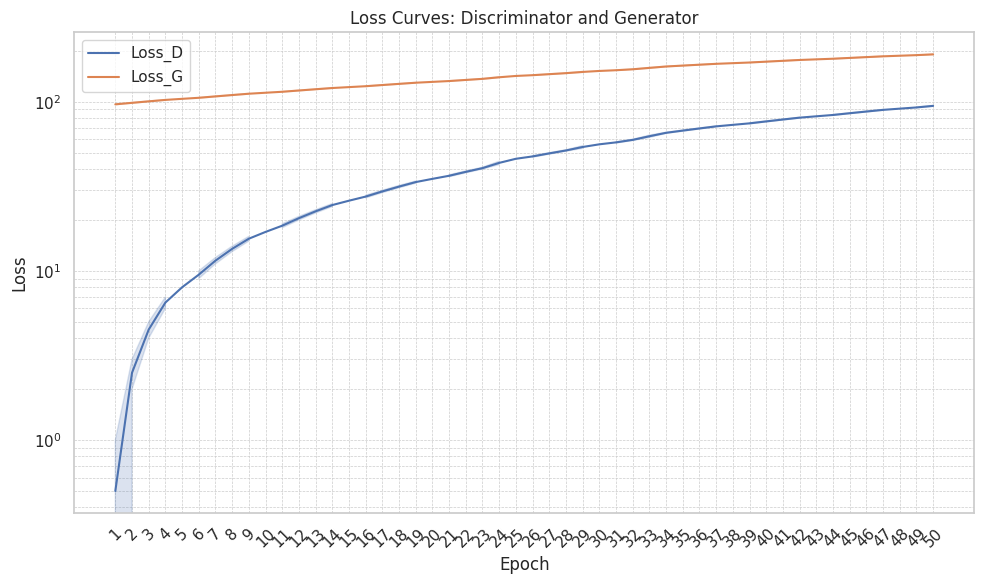

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

# Downsample the dataframe to keep one in every 100 data points
downsampled_df = df.iloc[::100, :]

# Create the Loss Curves plot
plt.figure(figsize=(10, 6))

# Plot the downsampled loss curves
sns.lineplot(x='Epoch', y='Loss_D', data=downsampled_df, label='Loss_D')
sns.lineplot(x='Epoch', y='Loss_G', data=downsampled_df, label='Loss_G')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves: Discriminator and Generator')
plt.legend()

# Set y-axis to log scale for better visualization of wide range of values
plt.yscale("log")

# Invert the y-axis to fix the y-axis inversion
plt.gca().invert_yaxis()

# Define a custom range of y-axis ticks (adjust as needed)
y_ticks = [10**i for i in range(0, 3)]
plt.yticks(y_ticks)

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45)

# Add grid lines for better reference
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


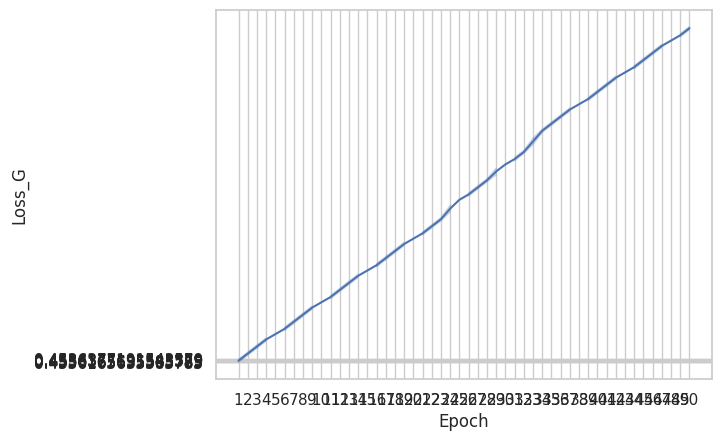

In [73]:
sns.lineplot(data=downsampled_df, x="Epoch", y="Loss_G")

# set the y ticks to be more sparse
plt.yticks(np.arange(0, 1.1, 0.1))

# Invert the y-axis to fix the y-axis inversion
plt.gca().invert_yaxis()

In [51]:
print(downsampled_df)

     Epoch              Loss_D               Loss_G           D(x)  \
1        1   1.464086890220642   0.4556165635585785    0.541015625   
101      1   1.466793417930603   0.4536377191543579  0.54345703125   
202      2  1.4679861068725586   0.4534154534339905    0.541015625   
302      2  1.4816054105758667  0.44493937492370605    0.544921875   
403      3  1.4806244373321533   0.4460529088973999  0.54248046875   
...    ...                 ...                  ...            ...   
8603    48  1.6571273803710938   0.3589630722999573   0.5419921875   
8704    49   1.657060980796814   0.3588670790195465     0.54296875   
8804    49  1.6608293056488037  0.35762739181518555  0.54052734375   
8905    50  1.6605277061462402   0.3576946258544922  0.54052734375   
9005    50  1.6600873470306396   0.3577382564544678  0.54150390625   

           D(G(z1))       D(G(z2)) Elapsed Time Time Left (Epoch)  \
1      0.5498046875   0.5498046875     00:00:03          00:10:52   
101   0.55517578125  

KeyboardInterrupt: 

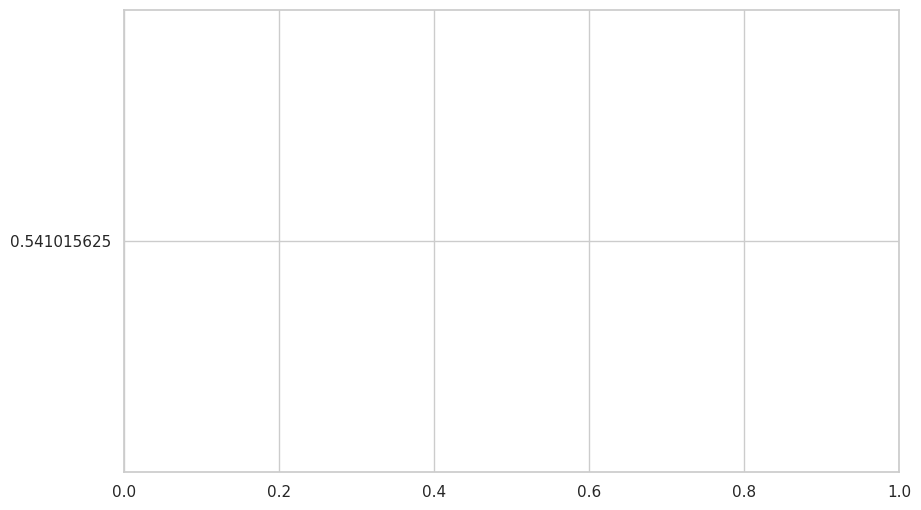

In [40]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the Discriminator Outputs plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Dec_Epoch', y='D(x)', data=df, marker='o', label='D(x)')
sns.lineplot(x='Dec_Epoch', y='D(G(z1))', data=df, marker='o', label='D(G(z1))')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Discriminator Output')
plt.title('Discriminator Outputs: Real vs. Generated Data')
plt.legend()

# Display the plot
print("Discriminator Outputs: Plot the Epoch against D(x) and D(G(z1)) or D(G(z2)). This can show you how well the discriminator is distinguishing between real and generated data. Over time, you should see D(x) decreasing and D(G(z1)) or D(G(z2)) increasing if the generator is improving.")
plt.show()

This plot shows the ratio of Loss_G to Loss_D over training epochs. Fluctuations or sudden changes in the ratio could indicate instability in the training process.


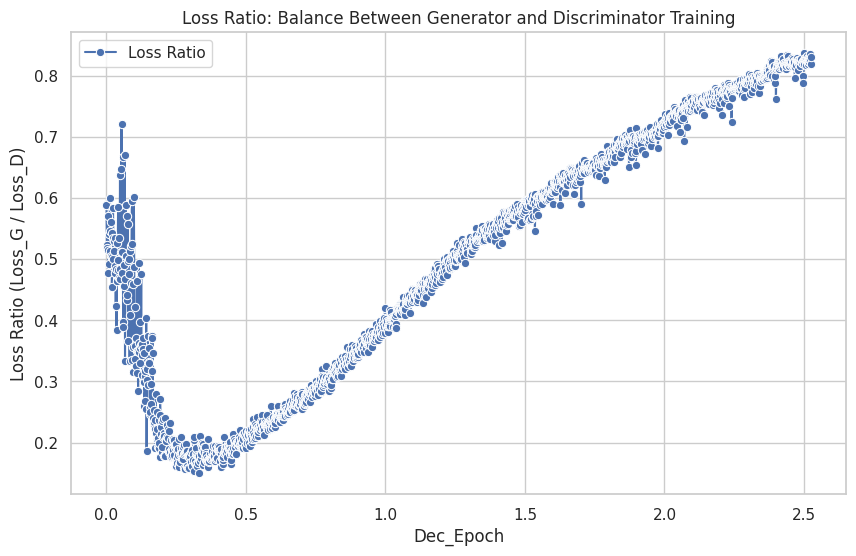

In [32]:
# Set Seaborn style
sns.set(style="whitegrid")

# Calculate the loss ratio
df['Loss_Ratio'] = df['Loss_G'] / df['Loss_D']

# Create the Loss Ratio plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='Dec_Epoch', y='Loss_Ratio', data=df, marker='o', label='Loss Ratio')

# Add labels and title
plt.xlabel('Dec_Epoch')
plt.ylabel('Loss Ratio (Loss_G / Loss_D)')
plt.title('Loss Ratio: Balance Between Generator and Discriminator Training')
plt.legend()

# Display the plot
print("This plot shows the ratio of Loss_G to Loss_D over training epochs. Fluctuations or sudden changes in the ratio could indicate instability in the training process.")
plt.show()


These scatter plots show the relationship between Loss_D and Loss_G for each epoch. Patterns such as trade-offs or correlations might be observed.


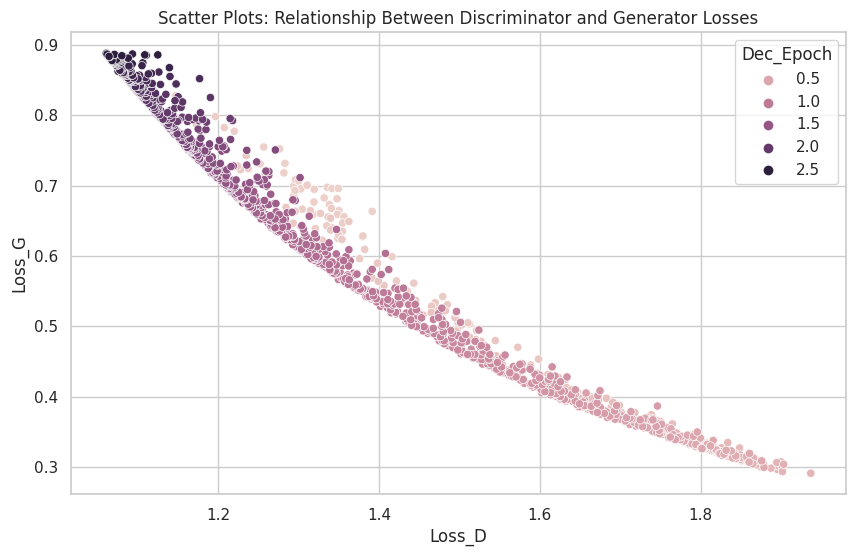

In [33]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the Scatter Plots
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='Loss_D', y='Loss_G', data=df, hue='Dec_Epoch')

# Add labels and title
plt.xlabel('Loss_D')
plt.ylabel('Loss_G')
plt.title('Scatter Plots: Relationship Between Discriminator and Generator Losses')
plt.legend(title='Dec_Epoch')

# Display the plot
print("These scatter plots show the relationship between Loss_D and Loss_G for each epoch. Patterns such as trade-offs or correlations might be observed.")
plt.show()
